#  正文


In [1]:
# 导入库
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import scipy.stats
import pandas as pd
import numpy as np

from math import log, sqrt, exp
from scipy.stats import norm
import scipy.stats 

from datetime import date
import datetime

import matplotlib.pyplot as plt  # 导入图像库
import matplotlib.ticker as ticker
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


import seaborn as sns
from scipy import stats

from empyrical import (
    alpha,
    beta,
    alpha_beta_aligned,
    annual_volatility,
    cum_returns,
    annual_return,
    downside_risk,
    max_drawdown,
    sharpe_ratio,
    sortino_ratio,
    calmar_ratio,
    omega_ratio,
    tail_ratio
)

# 数据导入 、基本指标计算

2017年到2021年的数据，

#### 股票的选择和说明
600276  恒瑞医药

600900 	长江电力 

601318  中国平安

http://data.eastmoney.com/other/index/hs300.html

In [2]:
#代入数据
data = pd.read_csv('./数据/good_data.csv')
data = data.iloc[:,:7].dropna()
data.shape
data

(1089, 7)

,Date,600276,600900,601318,600276_Return,600900_Return,601318_Return
1,2017/1/4,29.86,12.71,35.70,0.012469,0.007106,0.001121
2,2017/1/5,29.86,12.70,35.73,0.000000,-0.000787,0.000840
3,2017/1/6,29.48,12.71,35.44,-0.012808,0.000787,-0.008150
4,2017/1/9,29.21,12.73,35.44,-0.009201,0.001572,0.000000
5,2017/1/10,29.51,12.73,35.24,0.010218,0.000000,-0.005659
...,...,...,...,...,...,...,...
1085,2021/6/22,70.48,20.15,64.73,0.013858,0.010477,0.008845
1086,2021/6/23,71.15,20.27,65.82,0.009461,0.005938,0.016699
1087,2021/6/24,68.00,20.40,65.96,-0.045283,0.006393,0.002125
1088,2021/6/25,68.06,20.64,66.68,0.000882,0.011696,0.010857


In [3]:
# 划分数据 2017/01/03到2018/12/28   2019/01/02到2021/06/28
data['Date'] = pd.to_datetime(data['Date'])

# 用来计算vol，corr，cov等
data_history = data[(data['Date'] >=pd.to_datetime('20170103')) & (data['Date'] <= pd.to_datetime('20181228'))]
data_history

# 用来进行回测
data_backtest = data[(data['Date'] >pd.to_datetime('20181228')) & (data['Date'] <= pd.to_datetime('20210628'))]
data_backtest

,Date,600276,600900,601318,600276_Return,600900_Return,601318_Return
1,2017-01-04,29.86,12.71,35.70,0.012469,0.007106,0.001121
2,2017-01-05,29.86,12.70,35.73,0.000000,-0.000787,0.000840
3,2017-01-06,29.48,12.71,35.44,-0.012808,0.000787,-0.008150
4,2017-01-09,29.21,12.73,35.44,-0.009201,0.001572,0.000000
5,2017-01-10,29.51,12.73,35.24,0.010218,0.000000,-0.005659
...,...,...,...,...,...,...,...
482,2018-12-24,36.92,15.18,58.25,0.059711,-0.013089,-0.001544
483,2018-12-25,37.09,15.30,58.21,0.004594,0.007874,-0.000687
484,2018-12-26,36.11,15.52,57.30,-0.026778,0.014277,-0.015757
485,2018-12-27,35.76,15.58,56.90,-0.009740,0.003859,-0.007005


,Date,600276,600900,601318,600276_Return,600900_Return,601318_Return
487,2019-01-02,36.78,15.42,55.18,0.004087,-0.029395,-0.016535
488,2019-01-03,35.47,15.57,55.68,-0.036267,0.009681,0.009020
489,2019-01-04,37.74,15.32,56.59,0.062033,-0.016187,0.016211
490,2019-01-07,37.20,15.24,56.30,-0.014412,-0.005236,-0.005138
491,2019-01-08,37.49,15.56,55.80,0.007765,0.020780,-0.008921
...,...,...,...,...,...,...,...
1085,2021-06-22,70.48,20.15,64.73,0.013858,0.010477,0.008845
1086,2021-06-23,71.15,20.27,65.82,0.009461,0.005938,0.016699
1087,2021-06-24,68.00,20.40,65.96,-0.045283,0.006393,0.002125
1088,2021-06-25,68.06,20.64,66.68,0.000882,0.011696,0.010857


,600276_Return,600900_Return,601318_Return
1,0.012469,0.007106,0.001121
2,0.000000,-0.000787,0.000840
3,-0.012808,0.000787,-0.008150
4,-0.009201,0.001572,0.000000
5,0.010218,0.000000,-0.005659
...,...,...,...
482,0.059711,-0.013089,-0.001544
483,0.004594,0.007874,-0.000687
484,-0.026778,0.014277,-0.015757
485,-0.009740,0.003859,-0.007005


,600276_Return,600900_Return,601318_Return
600276_Return,1.000000,0.132843,0.325797
600900_Return,0.132843,1.000000,0.331508
601318_Return,0.325797,0.331508,1.000000


<AxesSubplot:>

(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, '600276_Return'),
  Text(1.5, 0, '600900_Return'),
  Text(2.5, 0, '601318_Return')])

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, '600276_Return'),
  Text(0, 1.5, '600900_Return'),
  Text(0, 2.5, '601318_Return')])

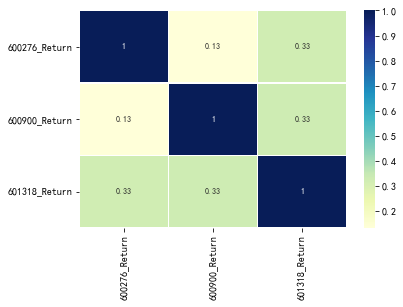

In [82]:
# 标的物的每日收益率
stock_return = data_history.iloc[:,[4,5,6]]
stock_return

# 计算相关矩阵
correlation_matrix = stock_return.corr()
correlation_matrix


# 创建热图并保存图片
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 8})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.savefig("./image/corr.jpg", dpi=300, bbox_inches = 'tight')
plt.show()

In [5]:
# 计算协方差矩阵
cov_mat = stock_return.cov()

# 年化协方差矩阵
cov_mat_annual = cov_mat * 252

# 输出协方差矩阵
print(cov_mat_annual)

               600276_Return  600900_Return  601318_Return
600276_Return       0.167101       0.008671       0.039143
600900_Return       0.008671       0.025498       0.015559
601318_Return       0.039143       0.015559       0.086385


In [6]:
# 股票代号名
ticker_list = np.array(data_history.columns)[[1,2,3]]
ticker_list 

# 股票数量
numstocks = 3

array(['600276', '600900', '601318'], dtype=object)

# 组合权重 --收益和风险   寻找最优的投资组合

常见的组合考虑：等权重的投资组合、市值加权的投资组合等等

4.1 蒙特卡洛模拟Markowitz模型

采用蒙特卡洛模拟来进行分析，也就是随机生成一组权重，计算该组合下的收益和标准差，重复这一过程许多次（比如1万次），将每一种组合的收益和标准差绘制成散点图。

https://zhuanlan.zhihu.com/p/62687160?from_voters_page=true
    

In [7]:
# 设置模拟的次数
number = 10000
# 设置空的numpy数组，用于存储每次模拟得到的权重、收益率和标准差
random_p = np.empty((number, numstocks+2))
# 设置随机数种子，这里是为了结果可重复
# np.random.seed(123)

# 循环模拟10000次随机的投资组合
for i in range(number):
    # 生成n个随机数，并归一化，得到一组随机的权重数据
    random_n = np.random.random(numstocks)
    random_weight = random_n / np.sum(random_n)
    
    # 计算年化平均收益率
    mean_return = stock_return.mul(random_weight, axis=1).sum(axis=1).mean()
    annual_return = (1 + mean_return)**252 - 1

    # 计算该权重下组合的年化标准差，组合波动率
    random_volatility = np.sqrt(np.dot(random_weight.T, np.dot(cov_mat_annual, random_weight)))

    # 将上面生成的权重，和计算得到的收益率、标准差存入数组random_p中
    random_p[i][:3] = random_weight
    random_p[i][3] = annual_return
    random_p[i][4] = random_volatility
    
# 将numpy数组转化成DataFrame数据框
RandomPortfolios = pd.DataFrame(random_p)
# 设置数据框RandomPortfolios每一列的名称
RandomPortfolios.columns = [ticker + "_weight" for ticker in ticker_list] + ['Returns', 'Volatility']


In [8]:
RandomPortfolios

,600276_weight,600900_weight,601318_weight,Returns,Volatility
0,0.203725,0.385725,0.410549,0.179702,0.195263
1,0.077579,0.547868,0.374553,0.175794,0.173711
2,0.415352,0.287190,0.297459,0.162710,0.230160
3,0.404677,0.545786,0.049537,0.129902,0.203504
4,0.128934,0.504790,0.366276,0.174263,0.177324
...,...,...,...,...,...
9995,0.254801,0.312880,0.432320,0.182273,0.209059
9996,0.611650,0.254927,0.133424,0.139341,0.275430
9997,0.731292,0.002602,0.266106,0.156042,0.332822
9998,0.048465,0.442442,0.509092,0.194477,0.192575


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

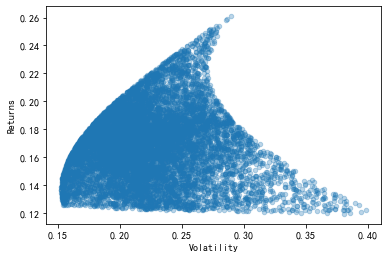

In [9]:
# 绘制散点图
RandomPortfolios.plot('Volatility', 'Returns', kind='scatter', alpha=0.3)
plt.show()

Text(0, 0.5, 'Return')

Text(0.5, 0, 'Volatility')

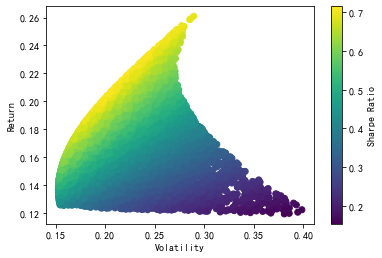

In [137]:
# 收益和风险之间找到平衡点，夏普比率这个变量能帮我做出更好的决策，它计算的是每承受一单位的风险所产生的超额回报

# 设置无风险回报率为0.06
risk_free = 0.06

# 计算每项资产的夏普比率
RandomPortfolios['Sharpe'] = (RandomPortfolios.Returns - risk_free)/ RandomPortfolios.Volatility

# 绘制收益-标准差的散点图，并用颜色描绘夏普比率
plt.scatter(RandomPortfolios.Volatility, RandomPortfolios.Returns, c=RandomPortfolios.Sharpe)
plt.colorbar(label='Sharpe Ratio')
plt.ylabel('Return')
plt.xlabel("Volatility")
plt.savefig("./image/Sharpe.jpg", dpi=300, bbox_inches = 'tight')
plt.show()


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

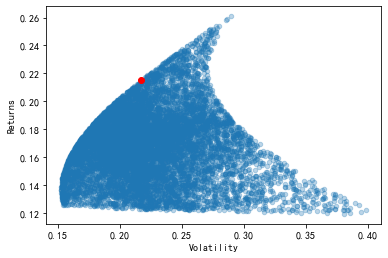

In [83]:
# 我们发现散点图上沿的组合具有较高的夏普比率。
# 接着再找到夏普比率最大的组合，将其绘制在收益-风险的散点图中

# 找到夏普比率最大数据对应的索引值
max_index = RandomPortfolios.Sharpe.idxmax()

# 在收益-风险散点图中突出夏普比率最大的点
RandomPortfolios.plot('Volatility', 'Returns', kind='scatter', alpha=0.3)
x = RandomPortfolios.loc[max_index,'Volatility']
y = RandomPortfolios.loc[max_index,'Returns']
plt.scatter(x, y, color='red')   
plt.savefig("./image/Markowitz-Sharpe.jpg", dpi=300, bbox_inches = 'tight')
plt.show()


In [12]:
# 复制一份
StockReturns = stock_return.copy()
StockReturns

,600276_Return,600900_Return,601318_Return
1,0.012469,0.007106,0.001121
2,0.000000,-0.000787,0.000840
3,-0.012808,0.000787,-0.008150
4,-0.009201,0.001572,0.000000
5,0.010218,0.000000,-0.005659
...,...,...,...
482,0.059711,-0.013089,-0.001544
483,0.004594,0.007874,-0.000687
484,-0.026778,0.014277,-0.015757
485,-0.009740,0.003859,-0.007005


In [13]:
# 累积收益曲线绘制函数
def cumulative_returns_plot(name_list):
    for name in name_list:
        CumulativeReturns = ((1+StockReturns[name]).cumprod()-1)
        CumulativeReturns.plot(label=name)
    plt.legend()
    plt.ylabel('累计收益率')
    plt.title("累计收益率曲线")
    plt.show()

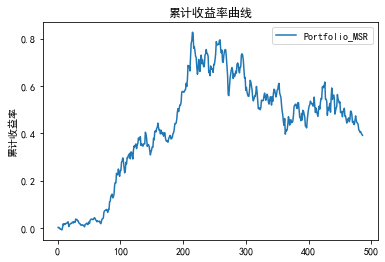

In [14]:
# 提取最大夏普比率组合对应的权重，并转化为numpy数组
MSR_weights = np.array(RandomPortfolios.iloc[max_index, 0:numstocks])

# 计算MSR组合的收益
StockReturns['Portfolio_MSR'] = stock_return.mul(MSR_weights, axis=1).sum(axis=1)

# 绘制累积收益曲线
# 'Portfolio_EW', 'Portfolio_MCap', 'Portfolio_GMV', 
cumulative_returns_plot(['Portfolio_MSR'])

In [15]:
# 通过上面方法得到的最佳权重
MSR_weights

array([0.0016126 , 0.34364079, 0.65474661])

# Simulate the stock price and price the stock option. 
   - Use the Monte Carlo method to price the stock option 
   - Compare the result with option pricing formula   


### 变量统一及解释

S0：标的证券的当前价格

K：期权的行权价

r：无风险利率

sigma(σ)：股票收益率的波动率

T：期权有效期限

In [17]:
# 组合的基本信息 S0，K, T ，P, weight等等

# 通过上面方法得到的最佳权重
MSR_weights

# 求各自的波动率

stock1_vol = np.sqrt(cov_mat_annual.iloc[0,0])

stock2_vol = np.sqrt(cov_mat_annual.iloc[1,1])

stock3_vol = np.sqrt(cov_mat_annual.iloc[2,2])

sigma = np.array([stock1_vol,stock2_vol,stock3_vol])
sigma

# 投资金额 100万
P = 1000000  

# 当前价格 2019/01/02
S0 = data[data['Date']==pd.to_datetime('20190102')][[ticker_list[0],ticker_list[1],ticker_list[2]]]
S0 = S0.values.reshape(3)
S0

#   K 执行价格，这里我们自己设定
K = np.ceil(S0 + 1 )
# K=S0
K
#   T 年为单位
T = 2

#  无风险利率
r = 0.06

# stockname = ["stock1","stock2","stock3"]

array([0.0016126 , 0.34364079, 0.65474661])

array([0.40878035, 0.1596823 , 0.29391385])

array([36.78, 15.42, 55.18])

array([38., 17., 57.])

In [18]:
# 使用bs公式计算期权价格
def get_option_price_bs(S0,K,r,vol,t,OptionType):
    if t == 0:
        t = 0.000001
    d1 = (np.log(S0/K)+(r+0.5*vol**2)
          * t)/(vol*np.sqrt(t))
    d2 = d1-vol*np.sqrt(t)
    if OptionType == 'C':
        bs_price = norm.cdf(d1)*S0 - \
            K*np.exp(-r*t)*norm.cdf(d2)
    else:
        bs_price = K * \
            np.exp(-r*t)*norm.cdf(-d2)-norm.cdf(-d1)*S0

    return bs_price

# 使用蒙特卡洛计算期权价格，默认10000000次路径
def get_option_price_MonteCarlo(S0,K,r,vol,t,OptionType, n=10000000):

    z = np.random.randn(1, n)  
    # 获得n次模拟下期权标的资产到期日的价格
    st = S0*np.exp((r-0.5*vol**2) * t+vol*np.sqrt(t)*z)[0]
    if OptionType == 'C':
        values = st-K
    else:
        values = K-st
    # 对n次模拟下期权价值取均值，获得期望收益，根据无风险利率贴现则为蒙特卡洛下期权的理论价格
    montecarlo_price = np.exp(-r*t) * np.mean([max(value, 0) for value in values])

    return montecarlo_price

# 获得两种方法下的期权价格
def get_option_price(S0,K,r,vol,t,OptionType):
    bs_price = get_option_price_bs(S0,K,r,vol,t,OptionType)
    mc_price = get_option_price_MonteCarlo(S0,K,r,vol,t,OptionType)
    print('----------Calculate the option price----------')
    print('The Black-Scholes-Merton option price is: %.4f' % bs_price)
    print('The Monte-Carlo simulation option price is: %.4f' % mc_price)


In [19]:
# 2种方法计算定价
for i in range(numstocks):
    print(ticker_list[i])
    get_option_price(t=T, 
                 S0=S0[i], 
                 K=K[i],
                 OptionType='C', 
                 r=r, 
                 vol=sigma[i])

600276
----------Calculate the option price----------
The Black-Scholes-Merton option price is: 9.6432
The Monte-Carlo simulation option price is: 9.6404
600900
----------Calculate the option price----------
The Black-Scholes-Merton option price is: 1.5488
The Monte-Carlo simulation option price is: 1.5486
601318
----------Calculate the option price----------
The Black-Scholes-Merton option price is: 11.2061
The Monte-Carlo simulation option price is: 11.2138


### 蒙特卡洛收敛速度考量

我们这里实验从1000次模拟到50000次模拟的结果，每次同样次数的模拟运行100遍。

蒙特卡洛方法会有收敛速度的考量。这里我们可以看到随着模拟次数的上升，仿真结果的置信区间也在逐渐收敛。


In [20]:
# 用于验证
def call_option_pricer_monte_carlo(spot, strike, maturity, r, vol, numOfPath = 10000000):
    randomSeries = scipy.random.randn(numOfPath)
    s_t = spot * np.exp((r - 0.5 * vol * vol) * maturity + randomSeries * vol * sqrt(maturity))
    sumValue = np.maximum(s_t - strike, 0.0).sum()
    price = exp(-r*maturity) * sumValue / numOfPath
    return price

print('看涨期权价格（蒙特卡洛） : %.4f' % call_option_pricer_monte_carlo(S0[1], K[1], T, r, sigma[1])) 

看涨期权价格（蒙特卡洛） : 1.5479


<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, '期权计算蒙特卡洛模拟')

Text(0, 0.5, '价格')

Text(0.5, 0, '模拟次数')

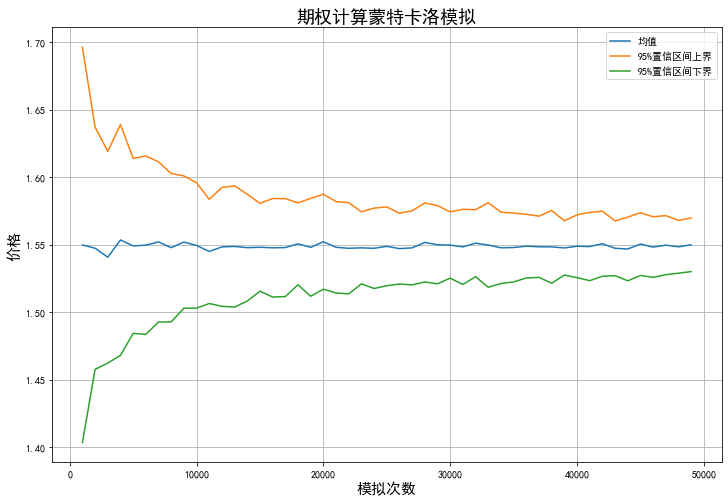

In [84]:
#  蒙特卡洛收敛度量分析 -- 未发散
# 这里使用第二个股票为例进行收敛验证

pathScenario = range(1000, 50000, 1000)
numberOfTrials = 100  #重复100次蒙特卡洛模拟，每次模拟的次数按上面递增，看是否收敛

confidenceIntervalUpper = []
confidenceIntervalLower = []
means = []

for scenario in pathScenario:
    res = np.zeros(numberOfTrials)
    for i in range(numberOfTrials):

        res[i] = call_option_pricer_monte_carlo(S0[1], K[1], T, r, sigma[1], numOfPath = scenario)
    means.append(res.mean())
    confidenceIntervalUpper.append(res.mean() + 1.96*res.std())
    confidenceIntervalLower.append(res.mean() - 1.96*res.std())
    
    
pylab.figure(figsize = (12,8))
tabel = np.array([means,confidenceIntervalUpper,confidenceIntervalLower]).T
pylab.plot(pathScenario, tabel)
pylab.title(u'期权计算蒙特卡洛模拟', fontsize = 18)
pylab.legend([u'均值', u'95%置信区间上界', u'95%置信区间下界'])
pylab.ylabel(u'价格', fontsize = 15)
pylab.xlabel(u'模拟次数', fontsize = 15)
pylab.grid(True)
pylab.savefig("./image/MC-convergence.jpg", dpi=300, bbox_inches = 'tight')


 # Using the stock price simulator to simulate time series of stock prices. 
  - Use the Monte Carlo method
  - use Cholesky decomposition for generating correlated normal random variables
  
 使用MC模拟出股票价格的随时间的变化路径

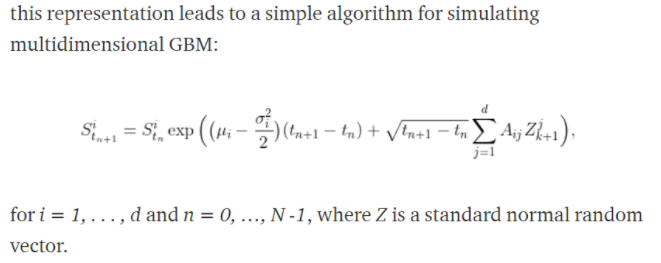

In [22]:
# 定义了一个函数来模拟给定参数的多维GBM。除了模型参数外，
# 我们还选择了插入一个与随机化种子相关的参数，
# 以便能够以相同的结果重复模拟

# Asset Path

# N 相当于模拟的天数
def GBMsimulator(seed, So, mu, sigma, Cov, T, N):
    """
    Parameters
    seed:   seed of simulation
    So:     initial stocks' price
    mu:     expected return
    sigma:  volatility
    Cov:    covariance matrix
    T:      time period
    N:      number of increments 要模拟的天数
    """
# 保证生成随机数的顺序一样
#     np.random.seed(seed)
    dim = np.size(So)
    t = np.linspace(0., T, int(N))
    A = np.linalg.cholesky(Cov) # 将协方差矩阵进行Cholesky拆分，获得下三角矩阵
    S = np.zeros([dim, int(N)])
    S[:, 0] = So # 股票起始价格
    for i in range(1, int(N)):    
        # 蒙特卡洛模拟公式
        drift = (mu - 0.5 * sigma**2) * (t[i] - t[i-1])
        Z = np.random.normal(0., 1., dim)
        diffusion = np.matmul(A, Z) * (np.sqrt(t[i] - t[i-1]))
        # 组合中各资产生成一条路径
        S[:, i] = S[:, i-1]*np.exp(drift + diffusion)
    # 返回路径和对应时间 
    return S, t

In [23]:
# A = np.linalg.cholesky(Cov)
# A
# correlation_matrix
# cov_mat

In [24]:
# seed = 2222                       

# T，N，用于 构造等差数列
dim = numstocks
N = int(252*T)   

# 期望收益率
mu = []
for i in range(dim):
    mu.append(stock_return.iloc[:,i].mean())
mu

#波动率
sigma


# Random Correlated Geometric Bronian Motion 
# 考虑了资产间相关性的几何布朗运动
if dim == 1:
    corr = np.array([1])
else:
    corr = correlation_matrix     #前面求得的日相关性矩阵
Cov = np.tensordot(sigma, sigma, 0) * corr    # 协方差矩阵covariance matrix


# Number of Simulations   多次模拟
# np.random.seed(seed)
simul = int(500)               # 每个标的物都 模拟500次  （500条路径，500个场景）                        
SS = np.zeros([simul, dim, N]) # 保存模拟数据


#循环模拟
for k in range(0, simul):
    seed = int(np.random.uniform(1,2**32-1,1))
    SS[k, :, :],time = GBMsimulator(seed, S0, mu, sigma, Cov, T, N)

[0.00044612418511016174, 0.0004727934129751492, 0.0009323172841433267]

array([0.40878035, 0.1596823 , 0.29391385])

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Multidimensional Correlated GBM')

Text(0.5, 0, 'Time')

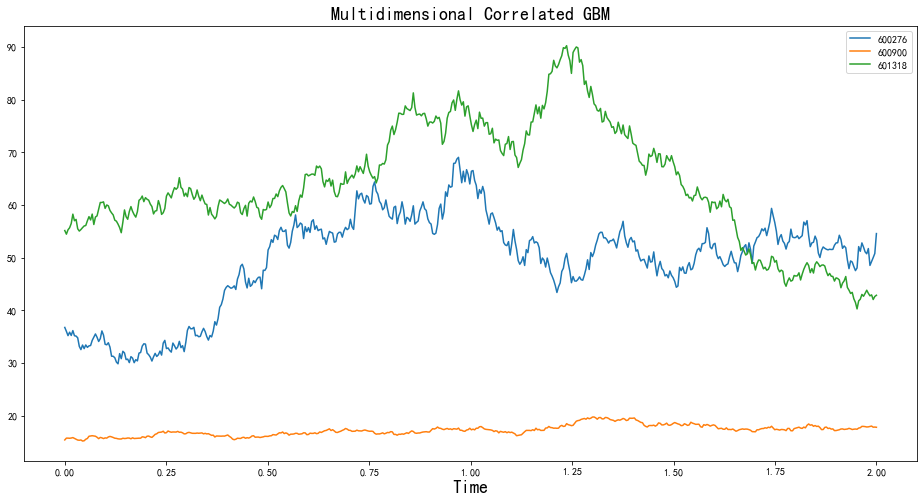

In [91]:
# Plot one of the simulations, e.g. the 0th
# 画出一个标的物 （股票）的模拟路径

plt.figure(figsize = (16,8))
plt.title('Multidimensional Correlated GBM', fontsize = 18)
plt.xlabel('Time', fontsize = 18)

# # 3个资产的第一次模拟的值图形，
for j in range(dim):
    plt.plot(time, SS[0, j, :])
    plt.legend([u'600276', u'600900', u'601318'])
plt.savefig("./image/one-simulated-path.jpg", dpi=300, bbox_inches = 'tight')
plt.show()


##### 各个资产的模拟路径图

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Multidimensional Correlated GBM')

Text(0.5, 0, 'Time')

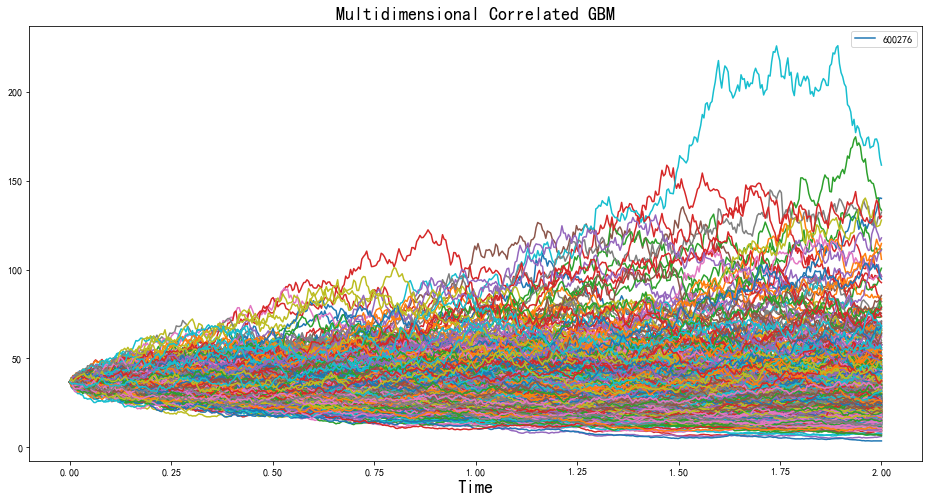

In [96]:
plt.figure(figsize = (16,8))
plt.title('Multidimensional Correlated GBM', fontsize = 18)
plt.xlabel('Time', fontsize = 18)

for j in range(simul):
    plt.plot(time, SS[j, 0, :])
plt.legend([ticker_list[0]])
plt.savefig("./image/all-simulated-path-of-s1.jpg", dpi=300, bbox_inches = 'tight')
plt.show()

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Multidimensional Correlated GBM')

Text(0.5, 0, 'Time')

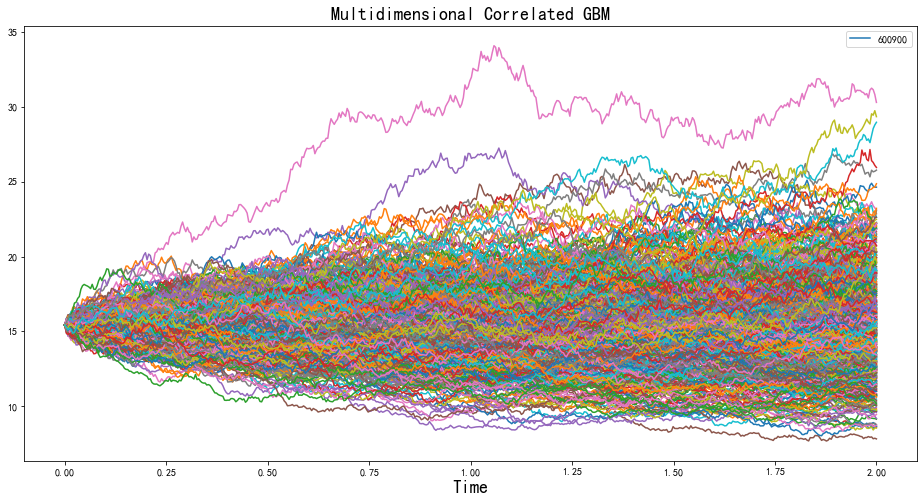

In [94]:
plt.figure(figsize = (16,8))
plt.title('Multidimensional Correlated GBM', fontsize = 18)
plt.xlabel('Time', fontsize = 18)

for j in range(simul):
    plt.plot(time, SS[j, 1, :])
plt.legend([ticker_list[1]])
plt.savefig("./image/all-simulated-path-of-s2.jpg", dpi=300, bbox_inches = 'tight')
plt.show()

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Multidimensional Correlated GBM')

Text(0.5, 0, 'Time')

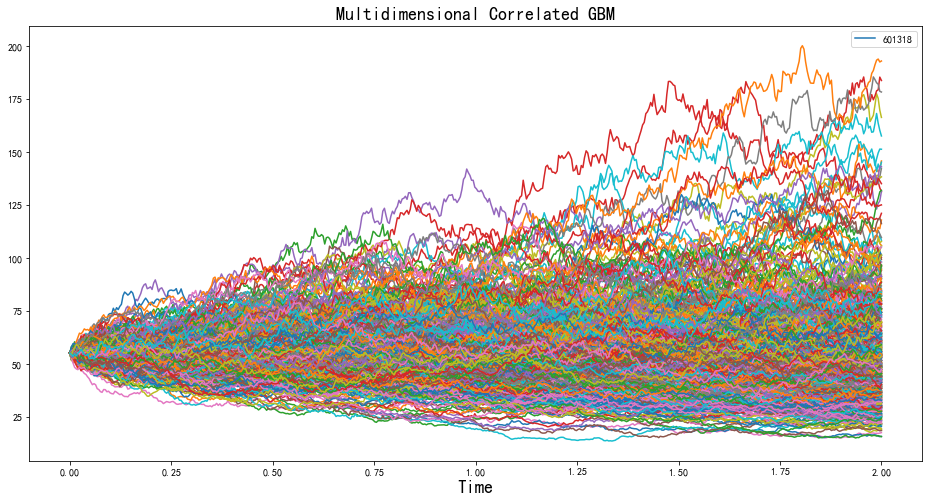

In [95]:
plt.figure(figsize = (16,8))
plt.title('Multidimensional Correlated GBM', fontsize = 18)
plt.xlabel('Time', fontsize = 18)

for j in range(simul):
    plt.plot(time, SS[j, 2, :])
plt.legend([ticker_list[2]])
plt.savefig("./image/all-simulated-path-of-s3.jpg", dpi=300, bbox_inches = 'tight')
plt.show()

In [29]:
# 模拟得到的数据
# SS
SS.shape 
# （1000，3，365）
# 例如：3个资产都模拟了365天，每天都模拟了1000次

(500, 3, 504)

In [31]:
#将上面n次模拟 分别 去求VaR

SS_St = pd.DataFrame()

for i in range(simul):
    for k,n in enumerate(ticker_list):
        SS_St[n+"_"+str(i)] = SS[i,k,:]

SS_St

,600276_0,600900_0,601318_0,600276_1,600900_1,601318_1,600276_2,600900_2,601318_2,600276_3,...,601318_496,600276_497,600900_497,601318_497,600276_498,600900_498,601318_498,600276_499,600900_499,601318_499
0,36.780000,15.420000,55.180000,36.780000,15.420000,55.180000,36.780000,15.420000,55.180000,36.780000,...,55.180000,36.780000,15.420000,55.180000,36.780000,15.420000,55.180000,36.780000,15.420000,55.180000
1,36.035872,15.764728,54.489846,37.401191,15.527553,55.934916,35.504806,15.425946,53.798474,36.778388,...,56.311429,35.870029,15.605586,56.097531,38.629807,15.227050,54.316173,35.666730,15.272993,54.616070
2,35.226610,15.763699,55.320101,36.124075,15.559989,55.334320,34.517726,15.294864,54.085283,36.322360,...,55.642789,37.143529,15.879635,55.697835,37.094278,15.267341,56.646549,35.730300,15.108614,53.754570
3,35.875028,15.738260,55.707919,36.506335,15.502650,53.482832,34.170321,15.318743,55.596552,35.825902,...,55.491605,36.289805,16.091136,55.216694,38.134350,15.455046,57.796069,35.845677,15.229788,54.860323
4,35.259714,15.781057,56.519072,36.804524,15.648170,53.153897,33.955264,15.503165,55.369494,36.058005,...,55.956883,37.852865,16.036006,55.726581,39.121982,15.506137,59.330368,35.686307,15.061390,53.968377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,48.555225,17.971815,42.782093,28.846260,15.945201,47.689637,21.488689,14.726482,31.318849,21.507120,...,48.265256,12.340121,12.824432,83.647750,44.623841,19.185929,68.509447,71.517901,18.597264,80.429812
500,49.284763,18.052397,42.962247,28.592190,15.903215,47.671279,21.419050,14.629009,31.832237,21.264970,...,47.501687,12.235220,12.972395,86.287699,45.268249,19.549169,69.604835,71.730331,18.858434,82.032670
501,50.037172,17.840892,42.081404,28.216423,15.689236,48.111936,20.985445,14.567888,32.025411,21.364034,...,46.682246,12.733543,12.867563,86.940607,47.965047,19.661334,70.100587,69.462259,19.070675,83.762246
502,50.824637,17.866266,42.661013,28.239732,15.807667,48.555995,20.217984,14.344396,31.820483,21.748061,...,46.334455,12.968523,12.876805,86.447385,48.094126,19.978657,69.444767,69.745952,19.210741,84.208883


# Using the full-revaluation simulation approach. 

   -  Repeat the process 100 times and calculate the Option VaR using Black scholes formula.


###### b-s：计算的步骤：

1. 多组合，得到各个资产的St，【上面模拟得到的500条路径】

#####   计算每条路径得到的VaR: (循环500次)

2. 得到每个资产的日收益，【B-S公式代入计算得到定价， 收益 = 今天的报价-昨天的报价】

3. 组合P&L

  P 是投资金额

  按 weight 得到每个资产分配到的金额
  
  每个资产购买的份数 = 该资产分配到的金额 / 其期权价格 
  
  计算每个资产的P&L : 每个资产购买的份数* return
 
  将得到的 P&L 相加得到组合P&L
  
4. 得到该路径下500天的VaR 【收到损益的分位数】

5.  然后得到500个路径下得到的VaR后,在500个路径中取平均得到的VaR,即我们想要的VaR.


In [32]:
#Function set 1, B-S model  B-S定价模型
def BSM(S0, K, T, r, sigma, type_):
    if T == 0:
        T = 0.000001
    d1 = (log(S0/K) + (r + 0.5 * sigma**2) * T) / sigma / sqrt(T)
    d2 = d1 - sigma * sqrt(T)
    Callprice = S0 * norm.cdf(d1) - K * exp(-r*T) * norm.cdf(d2)
    Putprice = -S0 * norm.cdf(-d1) + K*exp(-r*T)* norm.cdf(-d2)
    if type_=="call" or type_=="Call":
        return Callprice
    elif type_=="put" or type_=="Put" :
        return Putprice
    else:
        print("No match, check your type...")


In [35]:
#n个资产的B-S定价
ticker_simul = np.array(SS_St.columns)[list(range(simul*numstocks))]
# ticker_simul
SS_St_bs = pd.DataFrame()

for f in range(simul*numstocks):
#     for i in range(numstocks):
    temp=[]
    for k,t in enumerate(time[::-1]):
        temp.append(BSM(SS_St[ticker_simul[f]][k], K[f%3], t, r, sigma[f%3], 'call'))
    SS_St_bs[ticker_simul[f]+"_bs"] = temp
SS_St_bs

,600276_0_bs,600900_0_bs,601318_0_bs,600276_1_bs,600900_1_bs,601318_1_bs,600276_2_bs,600900_2_bs,601318_2_bs,600276_3_bs,...,601318_496_bs,600276_497_bs,600900_497_bs,601318_497_bs,600276_498_bs,600900_498_bs,601318_498_bs,600276_499_bs,600900_499_bs,601318_499_bs
0,9.643249,1.548787,1.120613e+01,9.643249e+00,1.548787e+00,1.120613e+01,9.643249e+00,1.548787e+00,1.120613e+01,9.643249e+00,...,1.120613e+01,9.643249e+00,1.548787e+00,11.206132,9.643249,1.548787,11.206132,9.643249,1.548787,11.206132
1,9.138299,1.753425,1.073871e+01,1.005140e+01,1.609077e+00,1.169600e+01,8.791910e+00,1.549129e+00,1.029268e+01,9.630931e+00,...,1.195081e+01,9.029586e+00,1.655892e+00,11.805783,10.899515,1.435144,10.625925,8.896990,1.461074,10.820991
2,8.601575,1.749519,1.127023e+01,9.185202e+00,1.625267e+00,1.127967e+01,8.151011e+00,1.470426e+00,1.046260e+01,9.316083e+00,...,1.148532e+01,9.865339e+00,1.822226e+00,11.522176,9.832073,1.454806,12.164757,8.927345,1.366425,10.250552
3,9.010728,1.730499,1.151442e+01,9.426929e+00,1.587947e+00,1.006367e+01,7.923003e+00,1.480959e+00,1.143991e+01,8.978637e+00,...,1.136987e+01,9.283389e+00,1.955107e+00,11.187238,10.531580,1.559889,12.946657,8.991550,1.430585,10.952285
4,8.600974,1.753765,1.204827e+01,9.614654e+00,1.672050e+00,9.842239e+00,7.779061e+00,1.585086e+00,1.127415e+01,9.119517e+00,...,1.166712e+01,1.032598e+01,1.915798e+00,11.512397,11.210932,1.586845,14.024442,8.876644,1.334748,10.359150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,10.591470,0.988291,1.386790e-15,1.496587e-08,7.842806e-05,3.190970e-07,1.620434e-29,3.085351e-14,7.577122e-60,1.953284e-29,...,1.624595e-06,6.093955e-107,3.362149e-46,26.702117,6.660584,2.202144,11.563815,33.554146,1.613480,23.484179
500,11.311950,1.064579,1.374329e-19,2.300811e-11,5.244215e-06,4.175951e-09,5.815380e-39,1.593418e-19,7.435249e-75,7.013616e-40,...,2.158123e-09,1.091272e-143,5.128201e-56,29.328480,7.295454,2.561331,12.645616,33.757518,1.870597,25.073450
501,12.055299,0.849021,3.624665e-32,2.523904e-17,4.170305e-10,1.141392e-11,4.652780e-61,3.183281e-29,1.183693e-108,1.295592e-57,...,2.537849e-15,2.383268e-199,3.635079e-87,29.967797,9.983174,2.669443,13.127777,31.480386,2.078785,26.789437
502,12.833702,0.870321,1.494400e-56,4.378167e-32,6.743500e-15,3.139232e-19,4.365321e-134,5.268204e-66,6.987638e-219,1.261963e-105,...,2.534699e-30,0.000000e+00,8.009304e-170,29.460982,10.103191,2.982712,12.458364,31.755017,2.214796,27.222480


In [36]:
# 收益
SS_St_bs_Return = pd.DataFrame()
for i in range(simul*numstocks):
    SS_St_bs_Return[ticker_simul[i]+"_bs_Return"] = SS_St_bs[ticker_simul[i]+"_bs"]-SS_St_bs[ticker_simul[i]+"_bs"].shift(1)

SS_St_bs_Return

,600276_0_bs_Return,600900_0_bs_Return,601318_0_bs_Return,600276_1_bs_Return,600900_1_bs_Return,601318_1_bs_Return,600276_2_bs_Return,600900_2_bs_Return,601318_2_bs_Return,600276_3_bs_Return,...,601318_496_bs_Return,600276_497_bs_Return,600900_497_bs_Return,601318_497_bs_Return,600276_498_bs_Return,600900_498_bs_Return,601318_498_bs_Return,600276_499_bs_Return,600900_499_bs_Return,601318_499_bs_Return
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.504950,0.204638,-4.674222e-01,4.081535e-01,6.029049e-02,4.898651e-01,-8.513386e-01,3.425661e-04,-9.134501e-01,-1.231797e-02,...,7.446790e-01,-6.136625e-01,1.071055e-01,0.599651,1.256267,-0.113643,-0.580208,-0.746259,-0.087713,-0.385141
2,-0.536724,-0.003906,5.315184e-01,-8.662002e-01,1.619002e-02,-4.163260e-01,-6.408988e-01,-7.870348e-02,1.699165e-01,-3.148477e-01,...,-4.654914e-01,8.357525e-01,1.663340e-01,-0.283607,-1.067442,0.019662,1.538832,0.030355,-0.094648,-0.570439
3,0.409153,-0.019020,2.441915e-01,2.417265e-01,-3.731976e-02,-1.215998e+00,-2.280087e-01,1.053308e-02,9.773107e-01,-3.374464e-01,...,-1.154467e-01,-5.819499e-01,1.328807e-01,-0.334938,0.699507,0.105083,0.781900,0.064205,0.064159,0.701733
4,-0.409754,0.023266,5.338457e-01,1.877250e-01,8.410302e-02,-2.214344e-01,-1.439418e-01,1.041272e-01,-1.657626e-01,1.408807e-01,...,2.972469e-01,1.042595e+00,-3.930916e-02,0.325159,0.679352,0.026955,1.077785,-0.114906,-0.095836,-0.593135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,-3.214311,0.062599,-5.081678e-12,-1.896923e-06,-8.765836e-04,-1.831631e-06,-2.219407e-21,-3.735866e-12,-2.524375e-46,-4.958734e-25,...,-2.156116e-04,-3.180585e-88,-1.393646e-34,-2.903955,-1.271322,0.053444,3.175730,-0.087587,-0.313129,-0.142461
500,0.720479,0.076288,-1.386652e-15,-1.494286e-08,-7.318385e-05,-3.149210e-07,-1.620434e-29,-3.085335e-14,-7.577122e-60,-1.953284e-29,...,-1.622436e-06,-6.093955e-107,-3.362149e-46,2.626362,0.634870,0.359187,1.081801,0.203371,0.257117,1.589271
501,0.743349,-0.215557,-1.374329e-19,-2.300809e-11,-5.243798e-06,-4.164537e-09,-5.815380e-39,-1.593418e-19,-7.435249e-75,-7.013616e-40,...,-2.158121e-09,-1.091272e-143,-5.128201e-56,0.639317,2.687720,0.108112,0.482161,-2.277132,0.208188,1.715986
502,0.778403,0.021300,-3.624665e-32,-2.523904e-17,-4.170238e-10,-1.141392e-11,-4.652780e-61,-3.183281e-29,-1.183693e-108,-1.295592e-57,...,-2.537849e-15,-2.383268e-199,-3.635079e-87,-0.506816,0.120017,0.313269,-0.669413,0.274630,0.136011,0.433044


In [44]:
# 每条路径的组合P&L
SS_St_bs_portfolio_PL = pd.DataFrame()

for i in range(simul):
    SS_St_bs_portfolio_PL["bs_portfolio_PL"+str(i)] = np.array(SS_St_bs_Return.loc[:,ticker_simul[i*3:i*3+3]+"_bs_Return"])@(P*MSR_weights/np.array(SS_St_bs[ticker_simul+"_bs"][:1].iloc[:,:3]).reshape(3))
SS_St_bs_portfolio_PL

,bs_portfolio_PL0,bs_portfolio_PL1,bs_portfolio_PL2,bs_portfolio_PL3,bs_portfolio_PL4,bs_portfolio_PL5,bs_portfolio_PL6,bs_portfolio_PL7,bs_portfolio_PL8,bs_portfolio_PL9,...,bs_portfolio_PL490,bs_portfolio_PL491,bs_portfolio_PL492,bs_portfolio_PL493,bs_portfolio_PL494,bs_portfolio_PL495,bs_portfolio_PL496,bs_portfolio_PL497,bs_portfolio_PL498,bs_portfolio_PL499
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18009.767709,4.206696e+04,-5.343699e+04,7.907989e+04,-69403.946419,78677.922223,2936.424845,1.843176e+04,-46725.138236,-2.105932e+04,...,105268.628408,-5.335127e+04,-85435.134394,7748.986917,-68972.080635,1.252903e+04,97080.675483,58697.776555,-58904.770633,-42089.135642
2,30098.974399,-2.087755e+04,-7.641898e+03,-1.662506e+04,-11121.153811,14544.931688,78084.845292,-2.939882e+04,-26848.017776,-3.624291e+04,...,35415.660317,-4.451204e+04,7763.864515,32226.732285,-20981.576052,-4.894706e+04,-50686.600087,20475.056183,94094.265379,-54324.620298
3,10115.781625,-7.928775e+04,5.940077e+04,-1.249305e+05,73206.821779,-78601.209438,-4767.087163,-5.188633e+04,-52490.168546,2.168048e+04,...,9794.048785,9.322409e+03,40282.651578,-22253.157860,116906.312097,-3.203390e+04,-32723.485418,9816.329819,69117.033717,55246.762490
4,36284.956384,5.754091e+03,1.339429e+04,-4.382487e+04,-7101.045848,-102135.013899,-33434.001638,1.410695e+02,-57018.260133,1.050906e+04,...,-44229.395014,5.176171e+03,-5381.337720,36205.454620,-8991.818121,2.801417e+04,8426.603565,10450.785564,69066.709362,-55938.535966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,13351.758881,-1.946014e+02,-8.289043e-07,-8.292283e-23,-345.852277,-8.741677,-182908.560596,-1.153527e-01,-16319.568880,-3.354698e-10,...,-68368.655935,-1.147151e-11,6466.788467,-24543.847485,-129748.140770,-4.005458e-05,-15.180670,-169670.906712,197195.554600,-77814.609510
500,17047.117004,-1.625625e+01,-6.845661e-09,-3.266395e-27,264.476085,-179.798476,-221841.656061,-3.971313e-03,-5390.661798,-5.394170e-14,...,-80055.910346,-6.300791e-13,72201.301651,-27774.012502,-186634.502681,-2.651147e-07,0.046582,153451.847845,143008.637706,149939.654627
501,-47703.019901,-1.163724e+00,-3.535435e-14,-1.172858e-37,-163.490241,-202.091536,-112933.182149,-2.311793e-06,-4022.545675,-1.417450e-24,...,4965.297494,-2.613254e-15,-17342.143198,2260.575780,-30217.686601,-1.264663e-12,-0.308161,37353.741235,52608.460173,146072.299947
502,4856.114517,-9.319504e-05,-7.062981e-24,-2.166564e-55,-25.148204,221.548024,42640.955271,-4.230496e-12,-499.973634,-2.683895e-35,...,-86246.936121,-3.085353e-22,31291.694622,-12732.862455,-32607.512998,-6.322870e-19,-0.012610,-29611.977331,30415.347692,55525.432636


In [47]:
# 求 VaR   取1%分位数位置

q_bs = []
for i in range(simul):
    q_i = np.percentile(np.array(SS_St_bs_portfolio_PL["bs_portfolio_PL"+str(i)][1:]),1) # 1%分位数位置
    q_bs.append(q_i)

#使用其平均值得到VaR
print("VaR")
np.array(q_bs).mean()


VaR


-133091.13749312356

# Using the sensitivity-based simulation approach.   

   -  Repeat the process 100 times and calculate the Option VaR using option greeks 


greek

###### 计算的步骤：

前面模拟得到各个资产的St，计算每条路径的Δx，delta，gamma，theta (循环500次)：

每条路径的过程：
1. 每个资产的Δx 【St - St-1】；对于delta，gamma，theta的计算应用各自函数求得.

2. 计算Δv，因为我们将波动率σ和无风险利率r固定，我们只考虑delta，gamma，theta，使用公式近似计算：
 
3. 计算每个资产的P&L : 每个资产购买的份数 * 对应的Δv；然后将得到的 各个P&L 相加得到组合P&L

4. 得到该路径下500天的VaR 【收到损益的分位数】

5.  然后得到500个路径下得到的VaR后,在500个路径中取平均得到的VaR,即我们想要的VaR.


In [48]:
# t以年为单位
def get_option_price_bs(S0,K,r,vol,t,OptionType):
    if t == 0:
        t = 0.00001
    d1 = (np.log(S0/K)+(r+0.5*vol**2)
          * t)/(vol*np.sqrt(t))
    d2 = d1-vol*np.sqrt(t)
    if OptionType == 'C':
        bs_price = norm.cdf(d1)*S0 - \
            K*np.exp(-r*t)*norm.cdf(d2)
    else:
        bs_price = K * \
            np.exp(-r*t)*norm.cdf(-d2)-norm.cdf(-d1)*S0

    return bs_price

def get_option_delta(S0,K,r,vol,t,OptionType):
    if t == 0:
        t = 0.00001
    d1 = (np.log(S0/K)+(r+0.5*vol**2)
          * t)/(vol*np.sqrt(t))
    if OptionType == 'C':
        delta = norm.cdf(d1)
    else:
        delta = -norm.cdf(-d1)

#   股票价格变化ds时，期权价格变化delta ds
    return delta

def get_option_gamma(S0,K,r,vol,t,OptionType, ds=0.00001):
    if t == 0:
        t = 0.00001
    
    pre_delta = get_option_delta(S0,K,r,vol,t,OptionType)
    S0 = S0+ds
    vol = vol
#     post_option = Option(S0=S0, K=K, r=r, t=t,
#                          vol=vol, OptionType=OptionType)
    post_delta = get_option_delta(S0,K,r,vol,t,OptionType)
    gamma = (post_delta-pre_delta)/ds

#         股票价格变化ds时，期权delta变化gamma ds
    return gamma


def get_option_theta(S0,K,r,vol,t,OptionType, dt=1.0/252):

    pre_price = get_option_price_bs(S0,K,r,vol,t,OptionType)

    t = (t-dt)  # annualize t
    
    post_price = get_option_price_bs(S0,K,r,vol,t,OptionType)
# (post_price-pre_price)/dt的时间以年为单位，通常计算theta时以天为单位，因此，需要将得出的结果除以交易天数
# theta为其他变量不变时，在一天过后的交易组合的价值变化
    theta = (post_price-pre_price)/dt

# 每过一天，期权价格变化theta
    return theta

#### 计算Δx，Δ，Γ，θ ，Δv

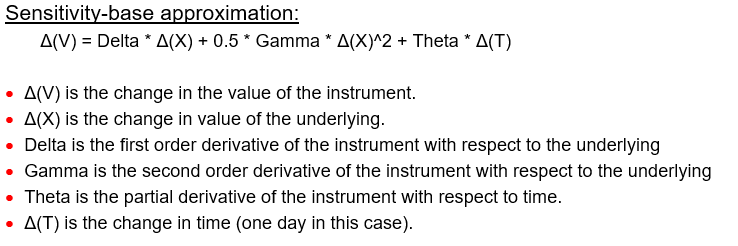

In [50]:
stockname = ticker_simul
delta = ticker_simul+"_delta"
gamma = ticker_simul+"_gamma"
theta = ticker_simul+"_theta"

##   Δx，Δ，Γ，θ，Δv
SS_St_sensi = pd.DataFrame()
for i in range(simul*numstocks):
    #delat x
    SS_St_sensi[stockname[i]+"_x"] = SS_St[stockname[i]]- SS_St[stockname[i]].shift(1)
    
    detla_temp,gamma_temp,theta_temp=[],[],[]
    for k,t in enumerate(time[::-1]):
        # 参数 S0,K,r,vol,t,OptionType
        detla_temp.append(get_option_delta(SS_St[stockname[i]][k], K[i%3],  r, sigma[i%3], t,'C'))
        gamma_temp.append(get_option_gamma(SS_St[stockname[i]][k], K[i%3],  r, sigma[i%3], t,'C'))
        theta_temp.append(get_option_theta(SS_St[stockname[i]][k], K[i%3],  r, sigma[i%3], t,'C'))
    SS_St_sensi[delta[i]] = detla_temp   
    SS_St_sensi[gamma[i]] = gamma_temp
    SS_St_sensi[theta[i]] = theta_temp
    SS_St_sensi[stockname[i]+"_v"] = SS_St_sensi[delta[i]].shift(1)*SS_St_sensi[stockname[i]+"_x"]+0.5* SS_St_sensi[gamma[i]].shift(1)*SS_St_sensi[stockname[i]+"_x"]*SS_St_sensi[stockname[i]+"_x"]+SS_St_sensi[theta[i]].shift(1)*1/252

SS_St_sensi
    
##  组合P&L
SS_St_sensi_portfolio_PL = pd.DataFrame()
for i in range(simul):
#     np.array(SS_St_bs[ticker_simul+"_bs"][:1].iloc[:,:3]).reshape(3)
    SS_St_sensi_portfolio_PL["sensi_portfolio_V"+str(i)] = np.array(SS_St_sensi[ticker_simul[i*3:i*3+3]+"_v"])@(MSR_weights*P/SS_St_bs.loc[0,ticker_simul[[0,1,2]]+"_bs"])

SS_St_sensi_portfolio_PL



<ipython-input-48-8a99d7d9238a>:6: RuntimeWarning: invalid value encountered in sqrt
  * t)/(vol*np.sqrt(t))
<ipython-input-48-8a99d7d9238a>:7: RuntimeWarning: invalid value encountered in sqrt
  d2 = d1-vol*np.sqrt(t)


,600276_0_x,600276_0_delta,600276_0_gamma,600276_0_theta,600276_0_v,600900_0_x,600900_0_delta,600900_0_gamma,600900_0_theta,600900_0_v,...,600900_499_x,600900_499_delta,600900_499_gamma,600900_499_theta,600900_499_v,601318_499_x,601318_499_delta,601318_499_gamma,601318_499_theta,601318_499_v
0,NaN,0.670097,1.703017e-02,-2.826311,NaN,NaN,0.584077,0.112012,-0.787128,NaN,...,NaN,0.584077,1.120117e-01,-0.787128,NaN,NaN,0.662194,0.015936,-3.617165,NaN
1,-0.744128,0.656982,1.766518e-02,-2.790107,-0.505138,0.344728,0.621441,0.106934,-0.821569,0.204880,...,-0.147007,0.567024,1.141454e-01,-0.771498,-0.087777,-0.563930,0.652895,0.016283,-3.589459,-0.385251
2,-0.809263,0.642178,1.836889e-02,-2.746929,-0.536958,-0.001029,0.620960,0.107089,-0.821759,-0.003900,...,-0.164378,0.547629,1.163238e-01,-0.753056,-0.094726,-0.861499,0.638414,0.016803,-3.542448,-0.570670
3,0.648418,0.653691,1.784346e-02,-2.786436,0.409361,-0.025440,0.617855,0.107636,-0.819650,-0.019023,...,0.121173,0.561191,1.149725e-01,-0.767051,0.064224,1.105753,0.656423,0.016181,-3.608345,0.702143
4,-0.615313,0.642319,1.838585e-02,-2.753890,-0.409904,0.042797,0.622077,0.107088,-0.823955,0.023289,...,-0.168398,0.541187,1.171343e-01,-0.747808,-0.095917,-0.891946,0.641525,0.016720,-3.560491,-0.593376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,-3.205256,0.999999,1.590483e-06,-2.278193,-3.214293,0.067613,0.997584,0.020794,-1.072014,0.062358,...,-0.309078,0.999997,3.957588e-05,-1.019208,-0.313121,-0.128877,1.000000,0.000000,-3.417145,-0.142434
500,0.729538,1.000000,6.239453e-09,-2.278640,0.720497,0.080582,0.999762,0.002832,-1.024022,0.076201,...,0.261170,1.000000,1.864064e-08,-1.019392,0.257126,1.602858,1.000000,0.000000,-3.417960,1.589298
501,0.752410,1.000000,0.000000e+00,-2.279184,0.743367,-0.211505,0.999699,0.004361,-1.024559,-0.215455,...,0.212241,1.000000,0.000000e+00,-1.019635,0.208196,1.729577,1.000000,0.000000,-3.418776,1.716013
502,0.787465,1.000000,0.000000e+00,-2.279728,0.778421,0.025374,1.000000,0.000010,-1.019881,0.021302,...,0.140066,1.000000,0.000000e+00,-1.019878,0.136019,0.446637,1.000000,0.000000,-3.419591,0.433071


,sensi_portfolio_V0,sensi_portfolio_V1,sensi_portfolio_V2,sensi_portfolio_V3,sensi_portfolio_V4,sensi_portfolio_V5,sensi_portfolio_V6,sensi_portfolio_V7,sensi_portfolio_V8,sensi_portfolio_V9,...,sensi_portfolio_V490,sensi_portfolio_V491,sensi_portfolio_V492,sensi_portfolio_V493,sensi_portfolio_V494,sensi_portfolio_V495,sensi_portfolio_V496,sensi_portfolio_V497,sensi_portfolio_V498,sensi_portfolio_V499
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18054.523897,4.209180e+04,-5.346634e+04,7.913610e+04,-69457.348273,78734.119798,2937.219717,1.844765e+04,-46787.513601,-2.106495e+04,...,105436.743215,-5.339689e+04,-85503.028768,7751.610635,-69020.158718,1.253423e+04,97175.627971,58735.930232,-58938.242538,-42109.815690
2,30115.590504,-2.087989e+04,-7.648456e+03,-1.662695e+04,-11125.509904,14552.664893,78142.505580,-2.941255e+04,-26863.425276,-3.625881e+04,...,35423.090743,-4.453532e+04,7770.529101,32246.322263,-20987.261835,-4.896911e+04,-50709.454958,20507.945340,94200.309320,-54355.251796
3,10121.739869,-7.935015e+04,5.944469e+04,-1.250790e+05,73277.064923,-78651.207620,-4763.797710,-5.191171e+04,-52520.176824,2.170051e+04,...,9805.136779,9.327329e+03,40308.035752,-22257.788915,117043.285235,-3.204548e+04,-32742.865121,9834.962994,69161.171595,55285.013008
4,36303.735085,5.766727e+03,1.341498e+04,-4.384637e+04,-7086.875019,-102228.668548,-33447.477403,1.469675e+02,-57057.081742,1.051570e+04,...,-44238.467129,5.189866e+03,-5379.428969,36227.154199,-8987.600561,2.803069e+04,8429.639156,10456.766461,69107.717621,-55970.571767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,13298.329423,-2.551533e+02,-1.754902e-07,3.573193e-22,-345.849270,-8.738672,-182905.201934,-1.457060e-01,-17486.810648,-5.063073e-10,...,-67756.824291,9.028363e-11,7362.836448,-24218.925412,-129503.958982,-4.946492e-05,-10.436915,-169669.331784,197290.753522,-77811.135739
500,17027.782402,-2.169998e+01,-3.786774e-09,-1.579181e-27,264.479090,-179.795470,-221838.296598,1.665489e-02,-5927.777589,1.318468e-12,...,-79173.959948,5.562451e-12,70520.317245,-28208.755566,-186104.647651,2.291828e-07,0.463551,153453.423148,143011.966964,149943.135913
501,-47680.220086,9.389847e-01,-3.240776e-14,1.533628e-37,-163.487234,-202.088529,-112929.821884,1.583789e-07,-5173.310536,8.157304e-24,...,6323.035820,1.903222e-15,-16746.927295,2686.207421,-30403.753527,3.996651e-12,-0.355526,37355.316914,52611.853966,146075.663265
502,4856.524955,6.463477e-04,4.003868e-22,8.126955e-54,-25.145197,221.551031,42644.316337,1.072642e-12,-24.953737,6.747486e-34,...,-85879.231529,5.707881e-22,28585.039917,-13574.191474,-32944.364803,-5.062758e-19,0.218632,-29610.401276,30418.711766,55528.796710


In [59]:
# 求 VaR  1%分位数位置

q_sensi = []
for i in range(simul):
    q_i = np.percentile(np.array(SS_St_sensi_portfolio_PL["sensi_portfolio_V"+str(i)][1:]),1) # 1%分位数位置
    q_sensi.append(q_i)


print("VaR")
np.array(q_sensi).mean()


VaR


-133233.24231982025

# 结果对比

In [97]:
## 两个VaR 大小比较
print('----------不同方法得到的VaR的比较----------')
print('VaR based on sensitivity-based simulation approach : %.4f' % np.array(q_sensi).mean())
print('VaR based on the full-revaluation simulation approach : %.4f' % np.array(q_bs).mean())



----------不同方法得到的VaR的比较----------
VaR based on sensitivity-based simulation approach : -133233.2423
VaR based on the full-revaluation simulation approach : -133091.1375


<AxesSubplot:>

Text(0.5, 1.0, 'VaR_sensitivity-based simulation')

<AxesSubplot:title={'center':'VaR_sensitivity-based simulation'}>

Text(0.5, 0, 'VaR')

Text(0, 0.5, '数量')

<AxesSubplot:>

Text(0.5, 1.0, 'VaR_full-revaluation simulation')

<AxesSubplot:title={'center':'VaR_full-revaluation simulation'}>

Text(0.5, 0, 'VaR')

Text(0, 0.5, '数量')

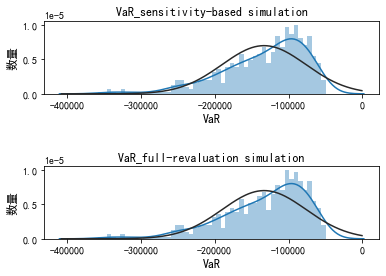

In [122]:
## 两个VaR 分布比较


plt.subplot(211)
plt.title('VaR_sensitivity-based simulation', fontsize = 12)
sns.distplot(q_sensi,kde=True,fit=stats.norm,bins=50)
plt.xlabel('VaR', fontsize = 12)
plt.ylabel('数量', fontsize = 12)

plt.subplots_adjust(hspace=1)

plt.subplot(212)
plt.title('VaR_full-revaluation simulation', fontsize = 12)
sns.distplot(q_bs,kde=True,fit=stats.norm,bins=50)
plt.xlabel('VaR', fontsize = 12)
plt.ylabel('数量', fontsize = 12)

plt.savefig("./image/VaR.jpg", dpi=300, bbox_inches = 'tight')


In [78]:
# 100个VaR的10%
np.percentile(np.array(q_sensi),10)

-210936.2109921401

##### 其他图形

Text(0.5, 1.0, '组合P&L分布')

<AxesSubplot:title={'center':'组合P&L分布'}, xlabel='bs_portfolio_PL0'>

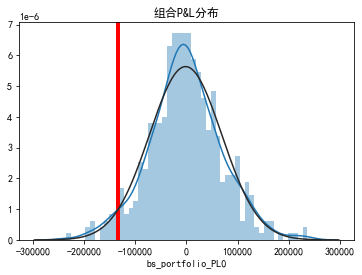

In [131]:
# 其中一个模拟得到收益分布，基于bs

plt.title('组合P&L分布', fontsize = 12)
plt.axvline(x=np.array(q_bs).mean(), linewidth=4, color='r') # 置信区间位置
sns.distplot(SS_St_bs_portfolio_PL["bs_portfolio_PL0"],kde=True,fit=stats.norm,bins=50)

plt.savefig("./image/one-MC-bs-P&L.jpg", dpi=300, bbox_inches = 'tight')


Text(0.5, 1.0, '组合P&L分布')

<AxesSubplot:title={'center':'组合P&L分布'}, xlabel='sensi_portfolio_V0'>

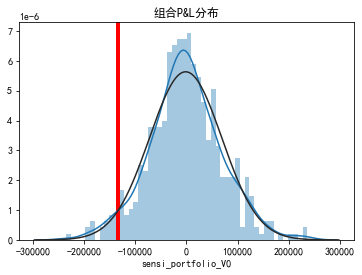

In [132]:
# 其中一个模拟得到收益分布，基于sensitive 
plt.title('组合P&L分布', fontsize = 12)
plt.axvline(x=np.array(q_sensi).mean(), linewidth=4, color='r') # 置信区间位置
sns.distplot(SS_St_sensi_portfolio_PL["sensi_portfolio_V0"],kde=True,fit=stats.norm,bins=50)

plt.savefig("./image/one-MC-sensi-P&L.jpg", dpi=300, bbox_inches = 'tight')

In [128]:
# 其中一个模拟得到收益分布sensi
# sns.distplot(SS_St_sensi_portfolio_PL["sensi_portfolio_V0"],kde=True,fit=stats.norm,bins=50)

In [133]:
#  其中一个模拟得到收益分布sensi，并标出 置信区间位置

# plt.title('组合P&L分布', fontsize = 12)
# plt.axvline(x=np.array(q_sensi).mean(), linewidth=4, color='r') # 置信区间位置
# sns.distplot(SS_St_sensi_portfolio_PL["sensi_portfolio_V1"],kde=True,fit=stats.norm,bins=50)


# backtest
 - 计算真实历史数据得到的VaR
 
1  得到真实的期权收盘价 ，计算得到return

2  得到组合的return 【权重*各自return】

3  得到VaR
 

In [65]:
data_backtest

,Date,600276,600900,601318,600276_Return,600900_Return,601318_Return
487,2019-01-02,36.78,15.42,55.18,0.004087,-0.029395,-0.016535
488,2019-01-03,35.47,15.57,55.68,-0.036267,0.009681,0.009020
489,2019-01-04,37.74,15.32,56.59,0.062033,-0.016187,0.016211
490,2019-01-07,37.20,15.24,56.30,-0.014412,-0.005236,-0.005138
491,2019-01-08,37.49,15.56,55.80,0.007765,0.020780,-0.008921
...,...,...,...,...,...,...,...
1085,2021-06-22,70.48,20.15,64.73,0.013858,0.010477,0.008845
1086,2021-06-23,71.15,20.27,65.82,0.009461,0.005938,0.016699
1087,2021-06-24,68.00,20.40,65.96,-0.045283,0.006393,0.002125
1088,2021-06-25,68.06,20.64,66.68,0.000882,0.011696,0.010857


In [66]:
# backdf = data_backtest.iloc[:504,[1,2,3]]
# backdf[backnames[0]]

In [67]:
backdf = data_backtest.iloc[:504,[1,2,3]]

backnames = np.array(backdf.columns)[[0,1,2]]

for i in range(numstocks):
    temp=[]
    for k,t in enumerate(time[::-1]):
        temp.append(BSM(backdf[backnames[i]][k+487], K[i], t, r, sigma[i], 'call'))
    backdf[backnames[i]+"_bs"] = temp
backdf

,600276,600900,601318,600276_bs,600900_bs,601318_bs
487,36.78,15.42,55.18,9.643249,1.548787,11.206132
488,35.47,15.57,55.68,8.769385,1.634459,11.524724
489,37.74,15.32,56.59,10.271420,1.484766,12.126069
490,37.20,15.24,56.30,9.892191,1.436322,11.913802
491,37.49,15.56,55.80,10.077702,1.618895,11.561632
...,...,...,...,...,...,...
986,88.31,19.10,85.20,50.346245,2.116215,28.254368
987,90.12,19.13,84.44,52.147187,2.142163,27.480781
988,93.83,18.91,83.80,55.848127,1.918109,26.827190
989,92.87,18.90,84.88,54.879065,1.904055,27.893597


In [68]:
# 收益
for i in range(numstocks):
    backdf[backnames[i]+"_bs_Return"] = backdf[backnames[i]+"_bs"]-backdf[backnames[i]+"_bs"].shift(1)

backdf

,600276,600900,601318,600276_bs,600900_bs,601318_bs,600276_bs_Return,600900_bs_Return,601318_bs_Return
487,36.78,15.42,55.18,9.643249,1.548787,11.206132,NaN,NaN,NaN
488,35.47,15.57,55.68,8.769385,1.634459,11.524724,-0.873864,0.085673,0.318592
489,37.74,15.32,56.59,10.271420,1.484766,12.126069,1.502035,-0.149693,0.601344
490,37.20,15.24,56.30,9.892191,1.436322,11.913802,-0.379229,-0.048444,-0.212267
491,37.49,15.56,55.80,10.077702,1.618895,11.561632,0.185511,0.182574,-0.352169
...,...,...,...,...,...,...,...,...,...
986,88.31,19.10,85.20,50.346245,2.116215,28.254368,0.840944,-0.304051,-1.613584
987,90.12,19.13,84.44,52.147187,2.142163,27.480781,1.800942,0.025948,-0.773587
988,93.83,18.91,83.80,55.848127,1.918109,26.827190,3.700940,-0.224053,-0.653590
989,92.87,18.90,84.88,54.879065,1.904055,27.893597,-0.969062,-0.014054,1.066406


In [69]:
#组合损益
backdf["bs_portfolio_PL"] = np.array(backdf.loc[:,backnames+"_bs_Return"])@(P*MSR_weights/np.array(backdf[backnames+"_bs"][:1]).reshape(3))
backdf

,600276,600900,601318,600276_bs,600900_bs,601318_bs,600276_bs_Return,600900_bs_Return,601318_bs_Return,bs_portfolio_PL
487,36.78,15.42,55.18,9.643249,1.548787,11.206132,NaN,NaN,NaN,NaN
488,35.47,15.57,55.68,8.769385,1.634459,11.524724,-0.873864,0.085673,0.318592,37477.281932
489,37.74,15.32,56.59,10.271420,1.484766,12.126069,1.502035,-0.149693,0.601344,2172.645041
490,37.20,15.24,56.30,9.892191,1.436322,11.913802,-0.379229,-0.048444,-0.212267,-23214.357838
491,37.49,15.56,55.80,10.077702,1.618895,11.561632,0.185511,0.182574,-0.352169,19963.592685
...,...,...,...,...,...,...,...,...,...,...
986,88.31,19.10,85.20,50.346245,2.116215,28.254368,0.840944,-0.304051,-1.613584,-161599.208441
987,90.12,19.13,84.44,52.147187,2.142163,27.480781,1.800942,0.025948,-0.773587,-39140.402950
988,93.83,18.91,83.80,55.848127,1.918109,26.827190,3.700940,-0.224053,-0.653590,-87281.130159
989,92.87,18.90,84.88,54.879065,1.904055,27.893597,-0.969062,-0.014054,1.066406,59027.128243


In [70]:
q_back = np.percentile(np.array(backdf["bs_portfolio_PL"][1:]),1) # 1%分位数位置

print("VaR")
q_back

VaR


-218498.83477608097

Text(0.5, 1.0, '真实组合P&L分布')

<AxesSubplot:title={'center':'真实组合P&L分布'}, xlabel='bs_portfolio_PL'>

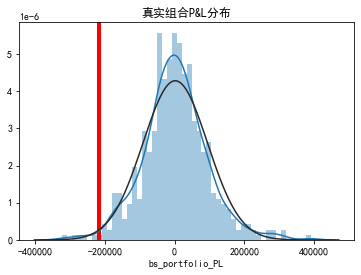

In [134]:
# backdf["bs_portfolio_Return"].plot("hit")

plt.title('真实组合P&L分布', fontsize = 12)
plt.axvline(x=q_back, linewidth=4, color='r') # 置信区间位置
sns.distplot(backdf["bs_portfolio_PL"],kde=True,fit=stats.norm,bins=50)

plt.savefig("./image/real-P&L.jpg", dpi=300, bbox_inches = 'tight')



<AxesSubplot:>

Text(0.5, 1.0, '组合P&L分布-BS')

<AxesSubplot:title={'center':'组合P&L分布-BS'}, xlabel='bs_portfolio_PL0'>

<AxesSubplot:>

Text(0.5, 1.0, '组合P&L分布-Greeks')

<AxesSubplot:title={'center':'组合P&L分布-Greeks'}, xlabel='sensi_portfolio_V0'>

<AxesSubplot:>

Text(0.5, 1.0, '真实组合P&L分布')

<AxesSubplot:title={'center':'真实组合P&L分布'}, xlabel='bs_portfolio_PL'>

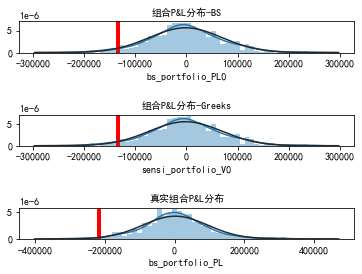

In [136]:
## 取2种方法的第一条路径 和 真实的路径 得出的VaR图进行比较

plt.subplot(311)
plt.title('组合P&L分布-BS', fontsize = 10)
plt.axvline(x=np.array(q_bs).mean(), linewidth=4, color='r') # 置信区间位置
sns.distplot(SS_St_bs_portfolio_PL["bs_portfolio_PL0"],kde=True,fit=stats.norm,bins=50)

plt.subplots_adjust(hspace=2)

plt.subplot(312)
plt.title('组合P&L分布-Greeks', fontsize = 10)
plt.axvline(x=np.array(q_sensi).mean(), linewidth=4, color='r') # 置信区间位置
sns.distplot(SS_St_sensi_portfolio_PL["sensi_portfolio_V0"],kde=True,fit=stats.norm,bins=50)


plt.subplots_adjust(hspace=2)

plt.subplot(313)
plt.title('真实组合P&L分布', fontsize = 10)
plt.axvline(x=q_back, linewidth=4, color='r') # 置信区间位置
sns.distplot(backdf["bs_portfolio_PL"],kde=True,fit=stats.norm,bins=50)

plt.savefig("./image/VaR-Compare.jpg", dpi=300, bbox_inches = 'tight')


# 其他（前期工作）

#### 期权的选择


全球期权：https://cj.sina.com.cn/articles/view/5449297209/144cdad3901900me04?from=finance

#### 国内的期权：选择较少   沪深300指数期权  2019年12月14日开始有

比如：IO2012-P-4600    交割时间最长的是一年，即有一年的历史数据

http://www.cffex.com.cn/rtj/     数据下载，需要整理

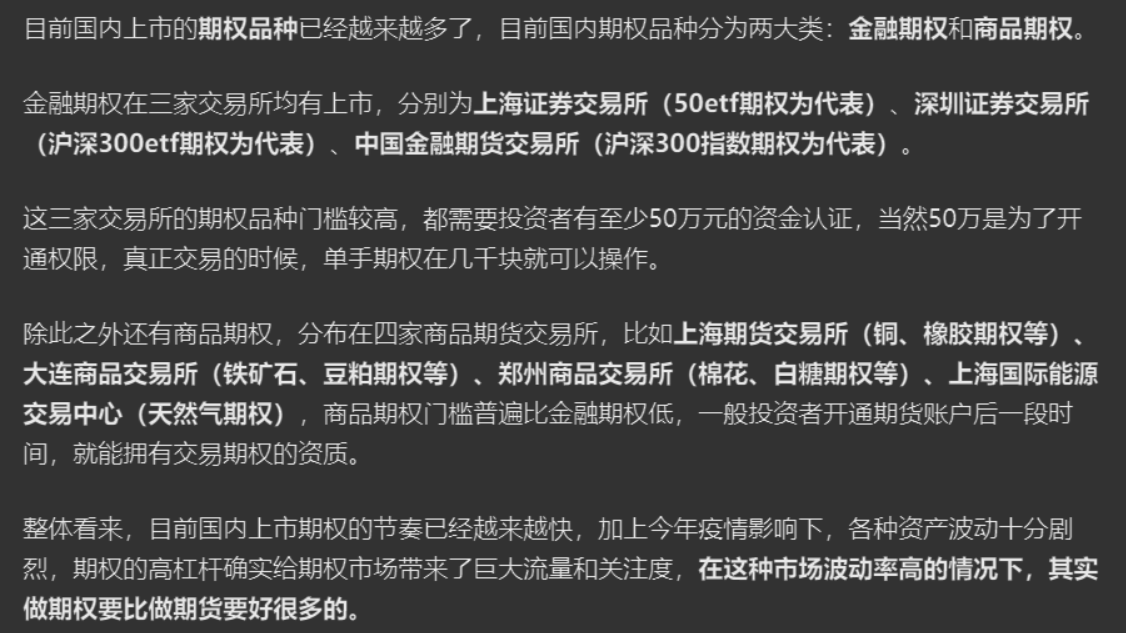


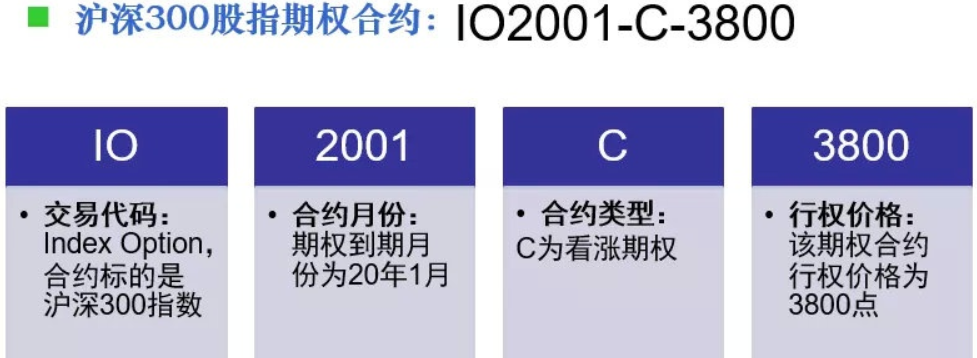



#### 香港的期权： 较多  ，有很多股票期权、外汇期权、指数期权

香港交易所的期权种类
https://sc.hkex.com.hk/TuniS/www.hkex.com.hk/Market-Data/Futures-and-Options-Prices/Single-Stock/Stock-Options?sc_lang=zh-CN#&sttype=options

网站的数据好像是实时的，比如
https://sc.hkex.com.hk/TuniS/www.hkex.com.hk/market-data/futures-and-options-prices/single-stock/details?sc_lang=zh-cn&product=HKB


#### 美国的期权：较多

https://www.barchart.com/options/price-history/daily-prices 

https://www.optionistics.com/quotes/stock-option-chains/SPX

https://www.barchart.com/options/unusual-activity/indices


👆以上都是要付费才可以获得的数据


https://www.cboe.com/us/options/market_statistics/historical_data/

👆好像是交易数量，不是价格，无用



https://www.poweropt.com/optionsbacktesting-instructions.asp 

👆未知，好像14日的免费



https://www.optiontradingtips.com/resources/historical-data/shanghai.html

👆2001-2014年的

后面再算吧


### 前期的期权选择 （可忽略）

##### 沪深300指数期权<br>
2019年12月23日，中金所正式上市沪深300股指期权，股指期权的挂牌合约规定是当月、下2个月以及随后3个季月，首批挂牌上市的6个合约是2002/2003/2004/2006/2009/2012，分别代表2020年2月、3月、4月、6月、9月、12月到期的期权合约，这6个期权合约都是可以交易，也就是说目前能交易最久的股指合约就是2020年12月到期的，大致是1年之后的，对于想要长时间持仓的投资者来说，可以选择做沪深300股指期权2012合约。

http://www.cffex.com.cn/hs300gzqq/

【最长持有时间一年】

##### 恒生指数期权<br>

https://www.hkex.com.hk/Market-Data/Futures-and-Options-Prices/Equity-Index/Hang-Seng-Index-Futures-and-Options?sc_lang=zh-HK#&product=HSI

【最长5年半】


#### 标普500指数期权<br>
https://www.cboe.com/tradable_products/sp_500/spx_end_of_month_options/specifications/

https://www.cboe.com/tradable_products/sp_500/mini_spx_options/


【最长1年】

